In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

In [2]:
str_results = pd.read_csv("../run_all_models_scripts/structural_model_held_out_test_results.csv")
phy_results = pd.read_csv("../run_all_models_scripts/physicochemical_model_held_out_test_results.csv")
img_results = pd.read_csv("../run_all_models_scripts/cellpainting_model_held_out_test_results.csv")
ge_results = pd.read_csv("../run_all_models_scripts/LINCSL1000_model_held_out_test_results.csv")
go_results = pd.read_csv("../run_all_models_scripts/GO_model_held_out_test_results.csv")
pid_results = pd.read_csv("../run_all_models_scripts/CellScape_model_held_out_test_results.csv") 
pid_cmu_results = pd.read_csv("../run_all_models_scripts/CellScape_Cmax_unbound_model_held_out_test_results.csv") 
pid_cmt_results = pd.read_csv("../run_all_models_scripts/CellScape_Cmax_total_model_held_out_test_results.csv") 
moa_results = pd.read_csv("../run_all_models_scripts/MOA_model_held_out_test_results.csv") 
moa_cmu_results = pd.read_csv("../run_all_models_scripts/MOA_Cmax_unbound_model_held_out_test_results.csv") 
moa_cmt_results = pd.read_csv("../run_all_models_scripts/MOA_Cmax_total_model_held_out_test_results.csv") 

str_results["Features"] ="Structural"
phy_results["Features"] ="Mordred"
img_results["Features"] ="Cell Painting"
ge_results["Features"] ="LINCSL1000"
go_results["Features"] ="GeneOntology"
pid_results["Features"] ="CellScape"
pid_cmu_results["Features"] ="CellScape with Cmax unbound"
pid_cmt_results["Features"] ="CellScape with Cmax total"
moa_results["Features"] ="MOA"
moa_cmu_results["Features"] ="MOA with Cmax unbound"
moa_cmt_results["Features"] ="MOA with Cmax total"

In [3]:
ensemble_all_results = pd.read_csv("./Ensemble_all_models_held_out_test_results.csv") 
ensemble_selected_results = pd.read_csv("./Ensemble_selected_models_held_out_test_results.csv") 

ensemble_all_results["Features"] ="Ensemble (all models)"
ensemble_selected_results["Features"] ="Ensemble (selected models)"

In [4]:
ensemble_selected_results

,SMILES,Dataset,Actviity,True_Value,Prediction,Probability,Best_Threshold,Features
0,C#CC1(O)CCC2C3CCC4=CCCCC4C3C(=C)CC21CC,sider_cardiacdisorders,Cardiac disorders,0.0,0,0.444618,0.5,Ensemble (selected models)
1,C=CC1=C(C)c2cc3[nH]c(cc4[nH]c(cc5nc(cc1n2)C(C)...,sider_cardiacdisorders,Cardiac disorders,0.0,1,0.607163,0.5,Ensemble (selected models)
2,CC(=CC(=O)OCCCCCCCCC(=O)[O-])CC1OCC(CC2OC2C(C)...,sider_cardiacdisorders,Cardiac disorders,0.0,1,0.542064,0.5,Ensemble (selected models)
3,CC(=O)C(C#N)C(=O)Nc1ccc(C(F)(F)F)cc1,sider_cardiacdisorders,Cardiac disorders,1.0,1,0.512995,0.5,Ensemble (selected models)
4,CC(=O)C(O)O,sider_cardiacdisorders,Cardiac disorders,0.0,0,0.411872,0.5,Ensemble (selected models)
...,...,...,...,...,...,...,...,...
488,O=C1[N-]C(=O)C(c2ccccc2)(c2ccccc2)N1,DICTrank,DICTrank,1.0,1,0.522085,0.5,Ensemble (selected models)
489,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,DICTrank,DICTrank,1.0,1,0.765879,0.5,Ensemble (selected models)
490,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,DICTrank,DICTrank,1.0,1,0.526656,0.5,Ensemble (selected models)
491,OC(c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)C1CCCC[N...,DICTrank,DICTrank,1.0,1,0.619225,0.5,Ensemble (selected models)


In [5]:
ensemble_all_results.groupby("Dataset").Features.value_counts()

Dataset                         Features             
DICTrank                        Ensemble (all models)    78
cardiotox_with_sider_actives    Ensemble (all models)    78
cardiotox_with_sider_all        Ensemble (all models)    78
cardiotox_with_sider_inactives  Ensemble (all models)    78
Name: Features, dtype: int64

In [6]:
allresults = pd.concat([str_results, phy_results, img_results, ge_results, go_results, 
                        pid_results, 
                        moa_results, pid_cmu_results,
                        pid_cmt_results, moa_cmu_results,
                        moa_cmt_results, ensemble_all_results,
                        ensemble_selected_results]).sort_values(["Dataset", "SMILES"],
                                                  ascending=[False, False]).reset_index(drop=True)
allresults=allresults[allresults["Dataset"]!="sider_cardiacdisorders"].reset_index(drop=True)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features
0,cardiotox_with_sider_inactives,Cardiotox (with SIDER inactives),OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0,1,0.747007,0.541602,Structural
1,cardiotox_with_sider_inactives,Cardiotox (with SIDER inactives),OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0,1,0.859187,0.534617,Mordred
2,cardiotox_with_sider_inactives,Cardiotox (with SIDER inactives),OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0,1,0.610511,0.404779,Cell Painting
3,cardiotox_with_sider_inactives,Cardiotox (with SIDER inactives),OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0,1,0.580656,0.553171,LINCSL1000
4,cardiotox_with_sider_inactives,Cardiotox (with SIDER inactives),OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0,1,0.574227,0.544033,GeneOntology
...,...,...,...,...,...,...,...,...
4531,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,1,0.680339,0.660530,CellScape
4532,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,0,0.459264,0.482587,MOA
4533,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,0,0.644047,0.668763,CellScape with Cmax total
4534,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,1,0.562222,0.538975,MOA with Cmax total


In [7]:
allresults.Features.unique()

array(['Structural', 'Mordred', 'Cell Painting', 'LINCSL1000',
       'GeneOntology', 'CellScape', 'MOA', 'CellScape with Cmax unbound',
       'CellScape with Cmax total', 'MOA with Cmax unbound',
       'MOA with Cmax total', 'Ensemble (all models)',
       'Ensemble (selected models)'], dtype=object)

In [8]:
larger_test = ['Structural', 'Mordred', 'Cell Painting', 'LINCSL1000',
       'GeneOntology', 'CellScape', 'MOA', 
       'CellScape with Cmax total',
       'MOA with Cmax total', 'Ensemble (all models)',
       'Ensemble (selected models)']

In [34]:
# Create a dictionary to map features to markers
feature_markers = {
    'Structural': 'o',
    'Mordred': 's',
    'Cell Painting': 'D',
    'LINCSL1000': '^',
    'GeneOntology': 'o',
    'CellScape': 'v',
    'MOA': 'o',
    'CellScape with Cmax unbound': 's',
    'CellScape with Cmax total': 'D',
    'MOA with Cmax unbound': '^',
    'MOA with Cmax total': 'v',
    'Ensemble (selected models)': 'P',  # New marker
    'Ensemble (all models)': 'X'  
}

colors = {
    'cardiotox_with_sider_inactives': 'Blue',
    'cardiotox_with_sider_all': 'Orange',
    'cardiotox_with_sider_actives': 'Green',
    'DICTrank': 'Gray'
}


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For better aesthetics (optional)
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import average_precision_score, precision_score

palette = sns.color_palette("colorblind", n_colors=len(allresults['Features'].unique()))

#

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


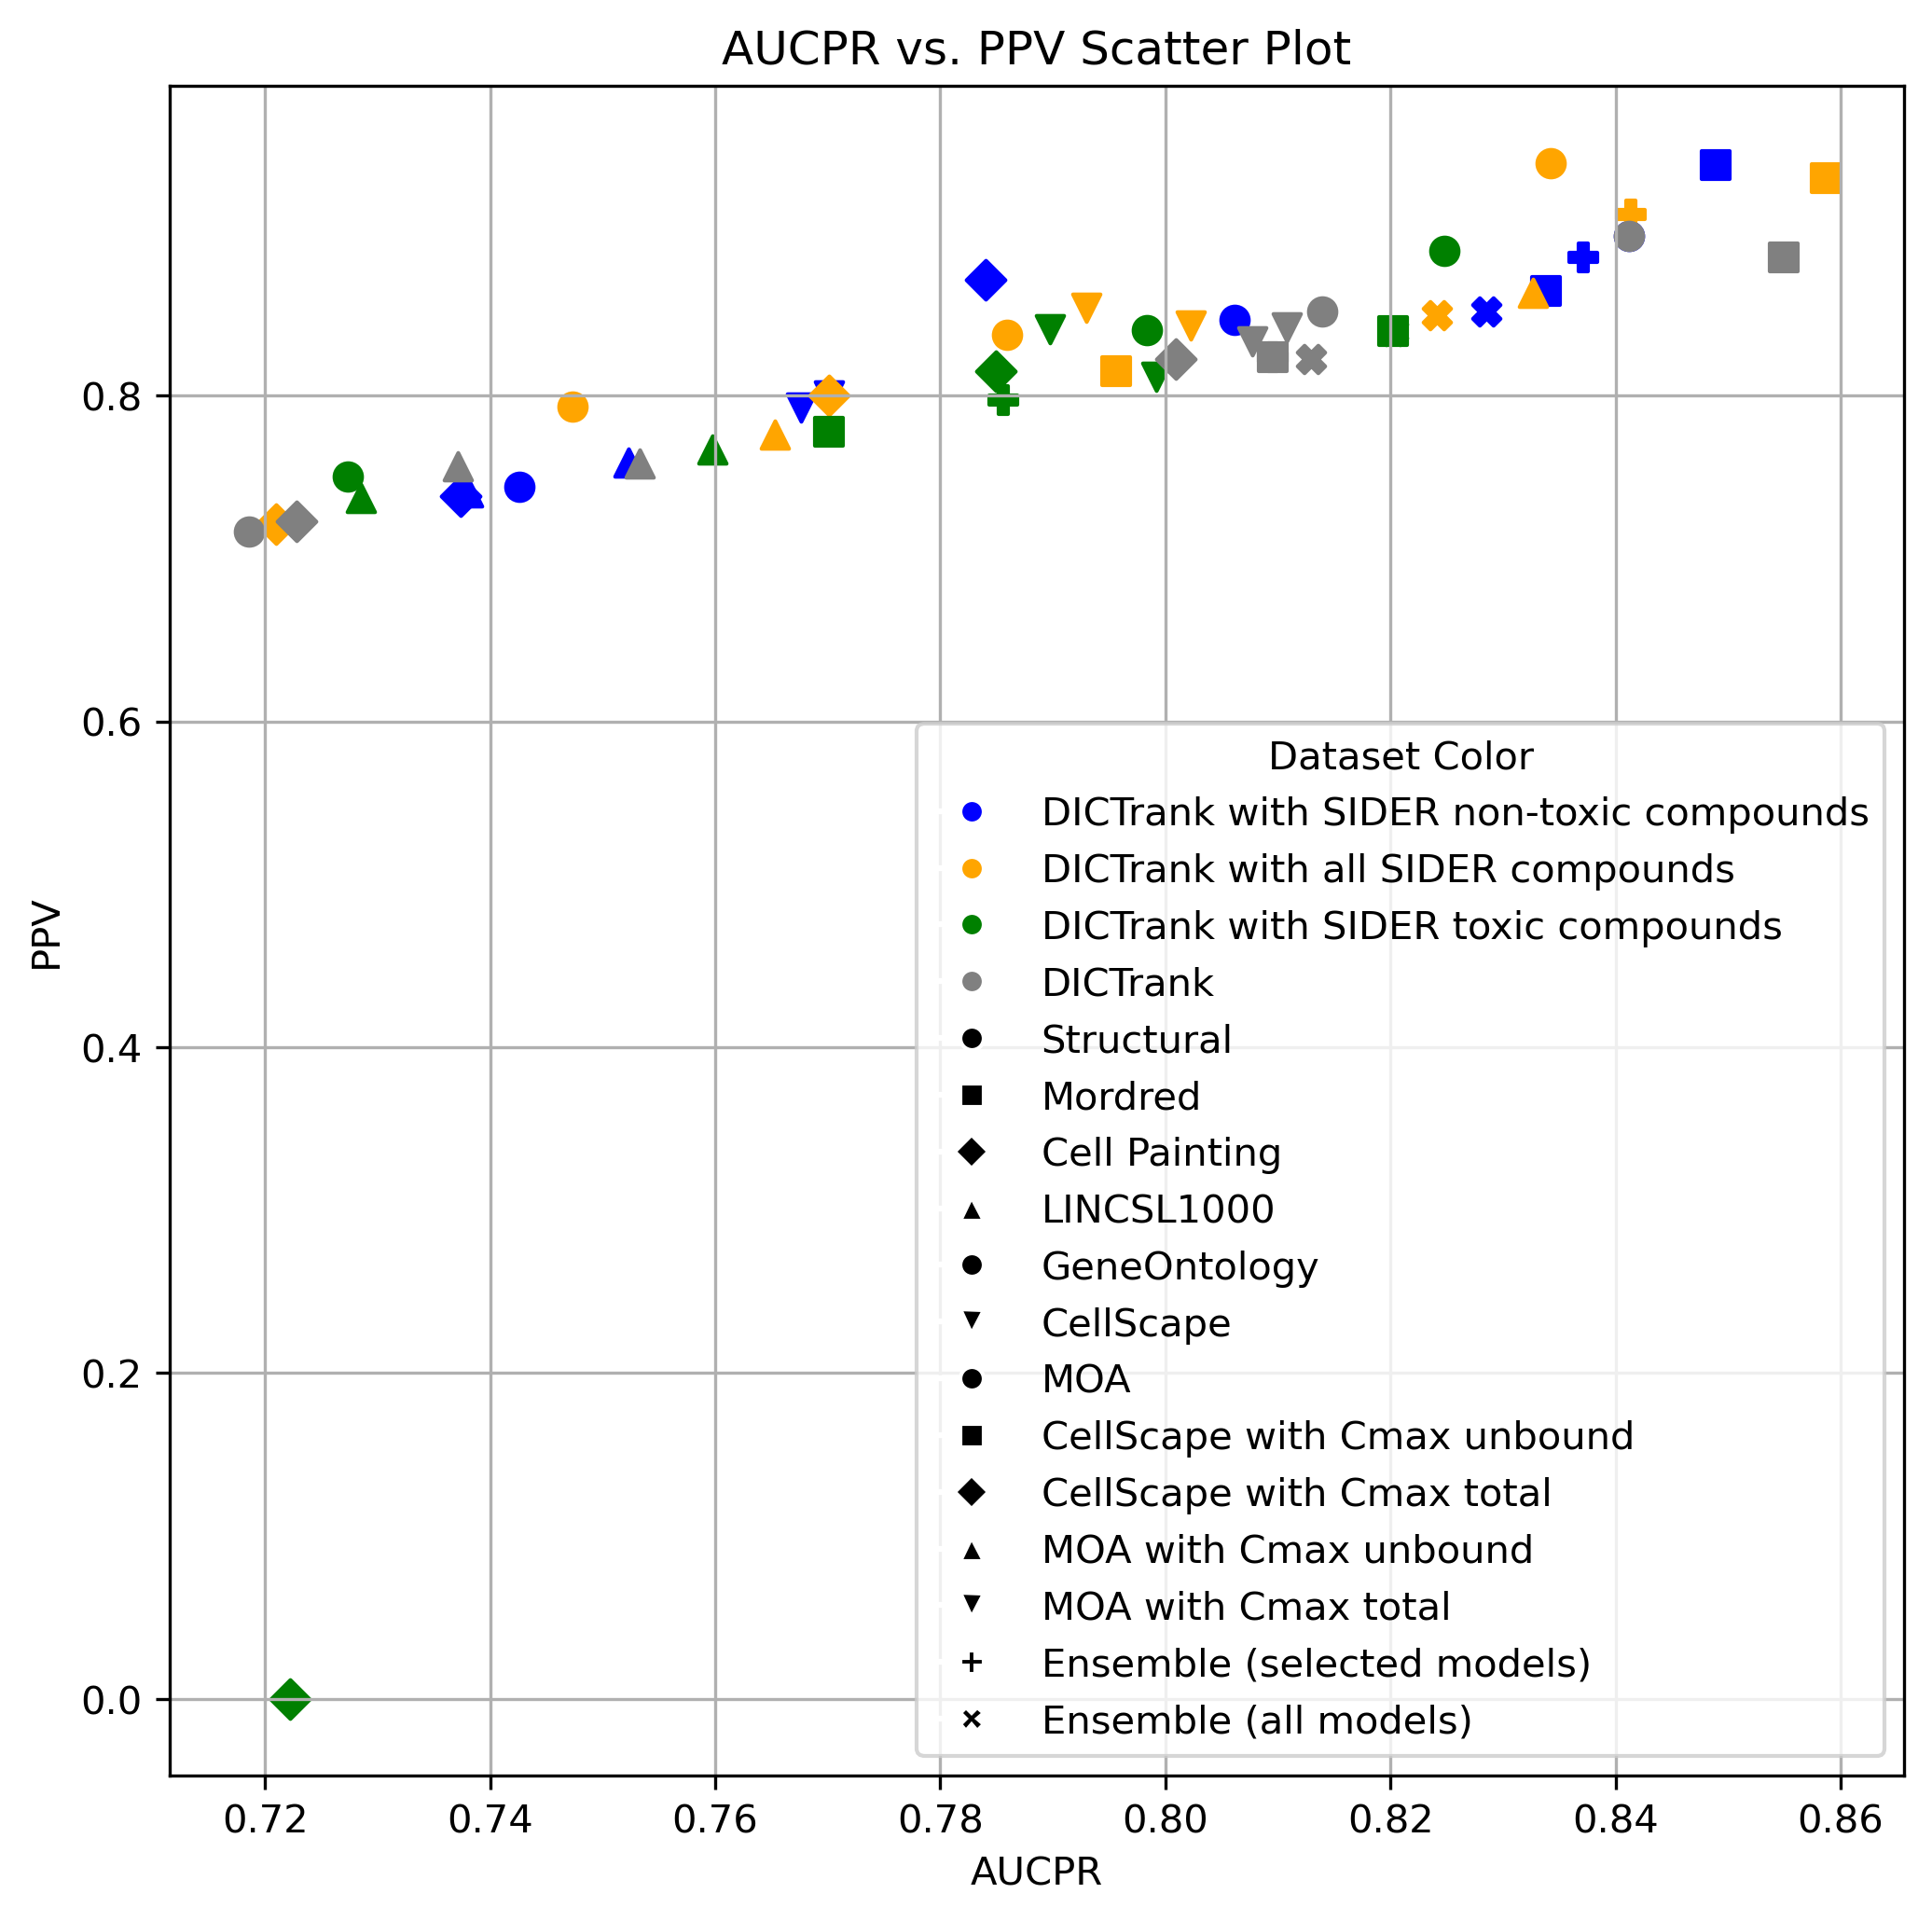

In [42]:
# Create a single scatter plot for all datasets and features
plt.figure(figsize=(8, 8), dpi=300)

for dataset in allresults['Dataset'].unique():
    dataset_df = allresults[allresults['Dataset'] == dataset].reset_index(drop=True)
    
    for feature in allresults['Features'].unique():
        feature_df = dataset_df[dataset_df['Features'] == feature].reset_index(drop=True)
        
        # Calculate AUCPR
        true_values = feature_df["True_Value"]
        predicted_probs = feature_df["Prediction"]
        aucpr = average_precision_score(true_values, predicted_probs)
        
        # Calculate PPV
        predictions = feature_df["Prediction"]
        ppv = precision_score(true_values, predictions)
        
        # Get the color and marker for the current dataset and feature
        color = colors[dataset]
        marker = feature_markers[feature]
        
        # Scatter plot for AUCPR vs. PPV with color and marker
        plt.scatter(
            aucpr,
            ppv,
            label=f'{feature}-{dataset}',
            color=color,
            marker=marker,
            s=50
        )

# Set labels and title
plt.xlabel('AUCPR')
plt.ylabel('PPV')
plt.title('AUCPR vs. PPV Scatter Plot')

# Create a legend for dataset colors
color_handles = [plt.Line2D([0], [0], marker='o', color='w', label=dataset, markerfacecolor=colors[dataset]) for dataset in allresults['Dataset'].unique()]
color_labels =     ['DICTrank with SIDER non-toxic compounds',
    'DICTrank with all SIDER compounds',
    'DICTrank with SIDER toxic compounds',
    'DICTrank']
# Create a legend for feature markers
marker_handles = [plt.Line2D([0], [0], marker=marker, color='w', label=feature, markerfacecolor='black') for feature, marker in feature_markers.items()]
marker_labels = [feature for feature in feature_markers]

plt.legend(handles=color_handles + marker_handles, labels=color_labels+ marker_labels, title='Dataset Color', loc='lower right')

# Show the plot
plt.grid(True)
plt.show()